# Pipeline ML (Iris)

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, ConfusionMatrixDisplay, classification_report
import joblib

## Data loading

In [ ]:
iris = load_iris()
X = iris.data
y = iris.target
target_names = iris.target_names
print(X.shape)
print(y.shape)

(150, 4)
(150,)


## Train/Test split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape)
print(X_test.shape)

(120, 4)
(30, 4)


## Preprocessing

In [ ]:
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, list(range(X.shape[1])))
    ])

## Model

In [ ]:
model = RandomForestClassifier(n_estimators=200, random_state=42, n_jobs=-1)
clf = Pipeline(steps=[('preprocessor', preprocessor),
                           ('model', model)])
print(clf)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  [0, 1, 2, 3])])),
                ('model',
                 RandomForestClassifier(n_estimators=200, n_jobs=-1,
                                        random_state=42))])


## Training

In [ ]:
print("Training...")
clf.fit(X_train, y_train)
print("Done.")

Training...
Done.


## Testing and metrics

In [ ]:
y_pred = clf.predict(X_test)
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print(f"Precision: {precision_score(y_test, y_pred, average='macro')}")
print(f"Recall: {recall_score(y_test, y_pred, average='macro')}")
print(classification_report(y_test, y_pred, target_names=target_names))

Accuracy: 1.0
Precision: 1.0
Recall: 1.0
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



## Plot

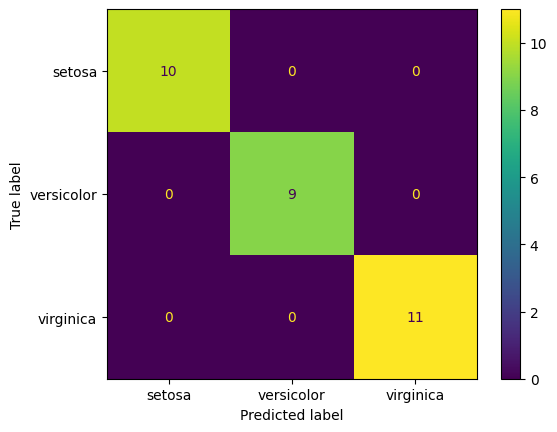

In [ ]:
cm = confusion_matrix(y_test, y_pred, labels=np.unique(y_test))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=target_names)
disp.plot()
plt.show()

## Model saving

In [ ]:
joblib.dump(clf, 'rf_iris_pipeline.joblib')

['rf_iris_pipeline.joblib']

# Pipeline ML (Titanic)

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, ConfusionMatrixDisplay, roc_auc_score, classification_report
import joblib

## Data loading

In [ ]:
df = sns.load_dataset("titanic")
X = df.drop("survived", axis=1)
y = df["survived"]
target_names = ["died", "survived"]
print(X.shape)
print(y.shape)
print(X.head())

(891, 14)
(891,)
   pclass     sex   age  sibsp  parch     fare embarked  class    who  \
0       3    male  22.0      1      0   7.2500        S  Third    man   
1       1  female  38.0      1      0  71.2833        C  First  woman   
2       3  female  26.0      0      0   7.9250        S  Third  woman   
3       1  female  35.0      1      0  53.1000        S  First  woman   
4       3    male  35.0      0      0   8.0500        S  Third    man   

   adult_male deck  embark_town alive  alone  
0        True  NaN  Southampton    no  False  
1       False    C    Cherbourg   yes  False  
2       False  NaN  Southampton   yes   True  
3       False    C  Southampton   yes  False  
4        True  NaN  Southampton    no   True  


## Train/Test split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape)
print(X_test.shape)

(712, 14)
(179, 14)


## Preprocessing

In [ ]:
num_features = ["age", "fare"]
cat_features = ["sex", "embarked", "pclass"]
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, num_features),
        ('cat', categorical_transformer, cat_features)
    ])

## Model

In [ ]:
model = RandomForestClassifier(n_estimators=300, random_state=42, n_jobs=-1)
clf = Pipeline(steps=[('preprocessor', preprocessor),
                           ('model', model)])
print(clf)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['age', 'fare']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(fill_value='missing',
                                                                                 strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHot

## Training

In [ ]:
print("Training...")
clf.fit(X_train, y_train)
print("Done.")

Training...
Done.


## Testing and metrics

In [ ]:
y_pred = clf.predict(X_test)
print(f"Accuracy: {accuracy_score(y_test, y_pred)}")
print(f"Precision: {precision_score(y_test, y_pred, average='macro')}")
print(f"Recall: {recall_score(y_test, y_pred, average='macro')}")
print(classification_report(y_test, y_pred, target_names=target_names))

Accuracy: 0.7821229050279329
Precision: 0.7754010695187166
Recall: 0.7783783783783784
              precision    recall  f1-score   support

        died       0.82      0.80      0.81       105
    survived       0.73      0.76      0.74        74

    accuracy                           0.78       179
   macro avg       0.78      0.78      0.78       179
weighted avg       0.78      0.78      0.78       179



## Plot

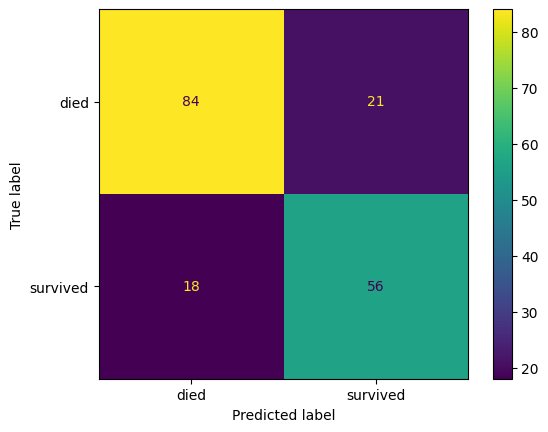

In [ ]:
cm = confusion_matrix(y_test, y_pred, labels=np.unique(y_test))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=target_names)
disp.plot()
plt.show()

## Model saving

In [ ]:
joblib.dump(clf, 'rf_titanic_pipeline.joblib')

['rf_titanic_pipeline.joblib']